In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X = pd.read_csv('/content/household_power_consumption.txt', delimiter=';')


<ipython-input-2-2babc190aaf0>:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv('/content/household_power_consumption.txt', delimiter=';')


In [3]:
X.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
X.isna().sum()


,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [5]:
X = X.fillna(method='ffill')


<ipython-input-5-3ba74b1bdbe7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV, ensuring 'Global_active_power' is read as a numeric type
X = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',
                converters={'Global_active_power': lambda x: pd.to_numeric(x, errors='coerce')})


<ipython-input-7-e94d616a9f1a>:6: DtypeWarning: Columns (3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',


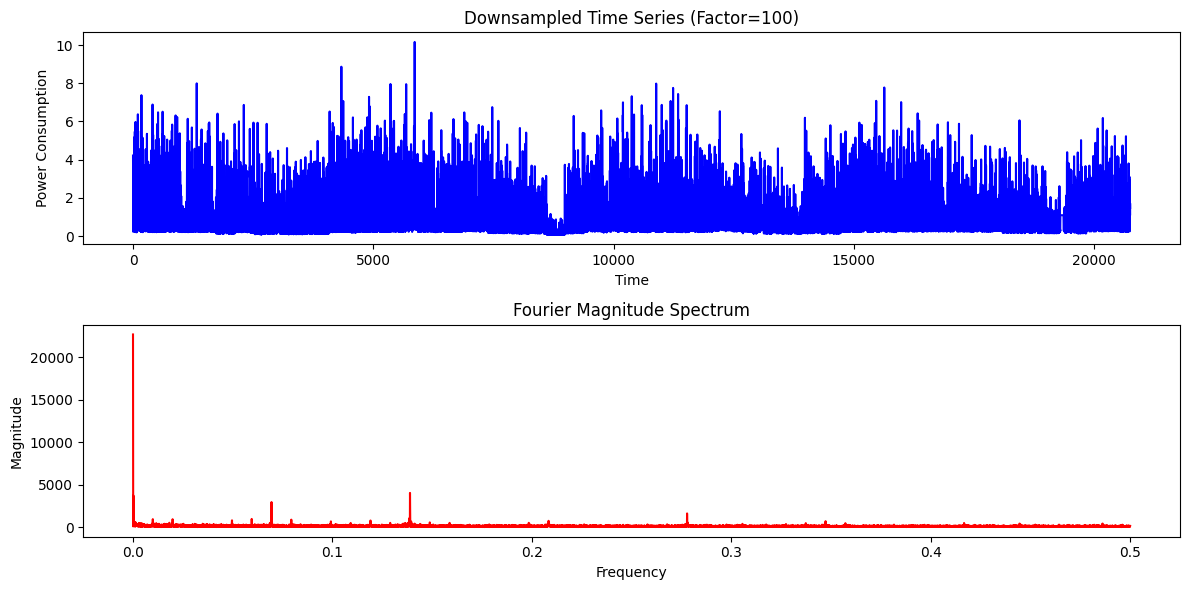


Dominant Frequencies (Top 5): [ 0.00019274 -0.00019274 -0.13887149  0.13887149  0.        ]


In [8]:
time_series = X['Global_active_power']

# Step 2: Handle missing values
time_series.fillna(time_series.mean(), inplace=True)

# Step 3: Aggressively Downsample Data
downsample_factor = 100  # Adjust factor based on performance
time_series = time_series.iloc[::downsample_factor].reset_index(drop=True)

# Step 4: Fourier Transform
time_series_np = time_series.to_numpy()
n = len(time_series_np)  # Number of data points
t = np.arange(n)  # Time vector

# Perform Fast Fourier Transform (FFT)
fft_result = np.fft.fft(time_series_np)
frequencies = np.fft.fftfreq(n)  # Frequency vector

# Get magnitude of the FFT
magnitude = np.abs(fft_result)

# Step 5: Visualize the Fourier Components
plt.figure(figsize=(12, 6))

# Original Downsampled Time Series
plt.subplot(2, 1, 1)
plt.plot(t, time_series_np, color='blue')
plt.title(f'Downsampled Time Series (Factor={downsample_factor})')
plt.xlabel('Time')
plt.ylabel('Power Consumption')

# Fourier Magnitude Spectrum
plt.subplot(2, 1, 2)
plt.plot(frequencies[:n // 2], magnitude[:n // 2], color='red')  # Plot positive frequencies
plt.title('Fourier Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Step 6: Identify Dominant Frequencies
dominant_freqs = frequencies[np.argsort(magnitude)[-5:]]  # Top 5 frequencies by magnitude
print("\nDominant Frequencies (Top 5):", dominant_freqs)


In [9]:
detrended_series = time_series_np - pd.Series(time_series_np).rolling(window=100).mean().fillna(0)


#Downsampling Value = 50

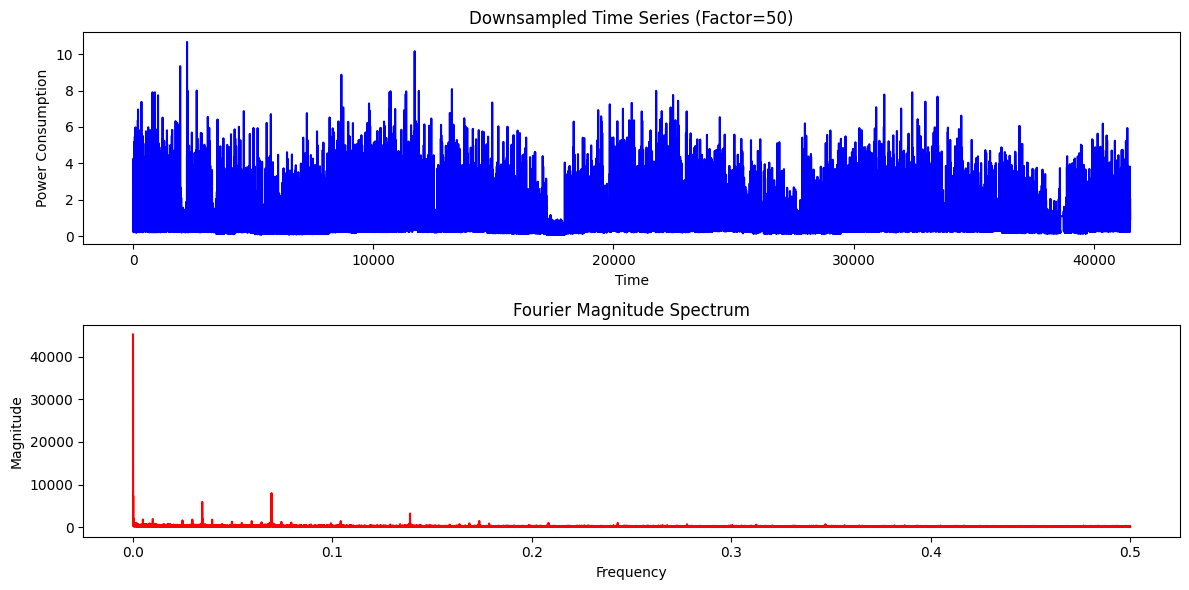

Dominant Frequencies (Top 5): [-9.63716089e-05  9.63716089e-05 -6.94357442e-02  6.94357442e-02
  0.00000000e+00]


In [9]:

time_series = X['Global_active_power']

# Step 2: Handle missing values
time_series.fillna(time_series.mean(), inplace=True)

# Step 3: Aggressively Downsample Data
downsample_factor = 50  # Adjust factor based on performance
time_series = time_series.iloc[::downsample_factor].reset_index(drop=True)

# Step 4: Fourier Transform
time_series_np = time_series.to_numpy()  # Convert to NumPy array for faster computation
n = len(time_series_np)  # Number of data points
t = np.arange(n)  # Time vector

# Perform Fast Fourier Transform (FFT)
fft_result = np.fft.fft(time_series_np)
frequencies = np.fft.fftfreq(n)  # Frequency vector

# Get magnitude of the FFT
magnitude = np.abs(fft_result)

# Step 5: Visualize the Fourier Components
plt.figure(figsize=(12, 6))

# Original Downsampled Time Series
plt.subplot(2, 1, 1)
plt.plot(t, time_series_np, color='blue')
plt.title(f'Downsampled Time Series (Factor={downsample_factor})')
plt.xlabel('Time')
plt.ylabel('Power Consumption')

# Fourier Magnitude Spectrum
plt.subplot(2, 1, 2)
plt.plot(frequencies[:n // 2], magnitude[:n // 2], color='red')  # Plot positive frequencies
plt.title('Fourier Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Step 6: Identify Dominant Frequencies
dominant_freqs = frequencies[np.argsort(magnitude)[-5:]]  # Top 5 frequencies by magnitude
print("Dominant Frequencies (Top 5):", dominant_freqs)


In [10]:
sampling_rate = 1  # Adjust if time units are available
periods = [1 / abs(freq) for freq in dominant_freqs if freq != 0]
print("Dominant Periods (in time units):", periods)


Dominant Periods (in time units): [10376.5, 10376.5, 14.40180430256766, 14.40180430256766]


#demonstrate how the dominant frequencies capture the main features of the time series and how a signal can be simplified by considering only these frequencies

<ipython-input-14-c81ca36b99db>:6: DtypeWarning: Columns (3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',


Dominant Frequencies (Top 5): [-9.63716089e-05  9.63716089e-05 -6.94357442e-02  6.94357442e-02
  0.00000000e+00]


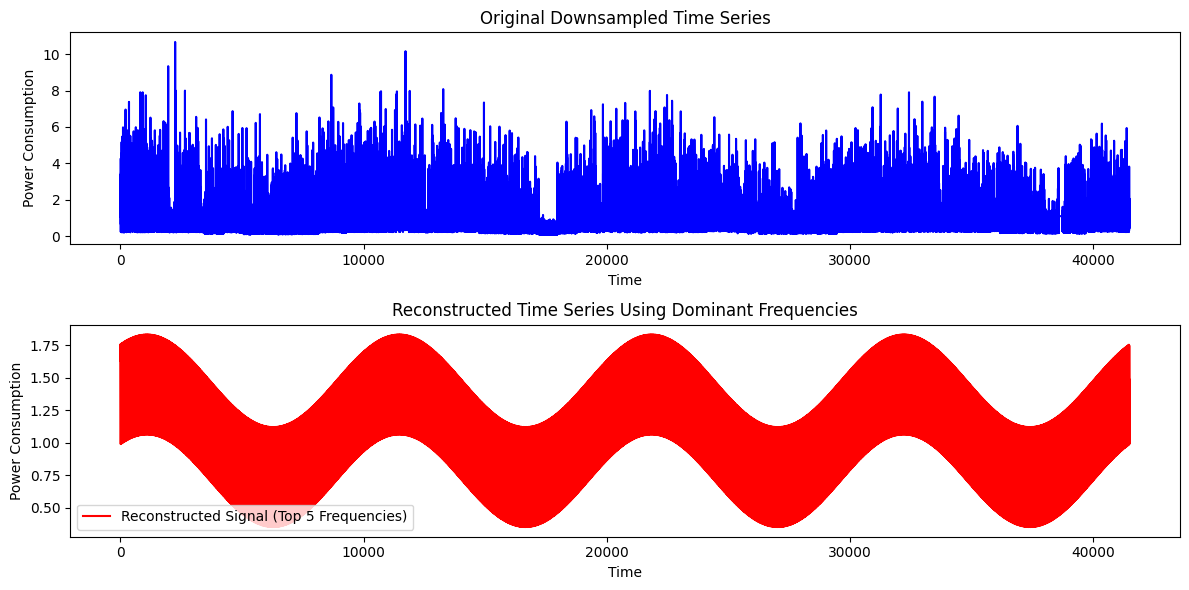

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read and preprocess the data
X = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',
                converters={'Global_active_power': lambda x: pd.to_numeric(x, errors='coerce')})
time_series = X['Global_active_power']
time_series.fillna(time_series.mean(), inplace=True)

# Downsample Data
downsample_factor = 50
time_series = time_series.iloc[::downsample_factor].reset_index(drop=True)
time_series_np = time_series.to_numpy()
n = len(time_series_np)

# Step 1: Fourier Transform
fft_result = np.fft.fft(time_series_np)
frequencies = np.fft.fftfreq(n)
magnitude = np.abs(fft_result)

# Step 2: Identify Dominant Frequencies
num_dominant = 5  # Number of dominant frequencies to extract
indices = np.argsort(magnitude)[-num_dominant:]  # Indices of top frequencies
dominant_freqs = frequencies[indices]
print("Dominant Frequencies (Top 5):", dominant_freqs)

# Step 3: Reconstruct Signal Using Dominant Frequencies
reconstructed_fft = np.zeros_like(fft_result)  # Start with zeroed FFT result
reconstructed_fft[indices] = fft_result[indices]  # Keep only dominant frequencies
reconstructed_fft[-indices] = fft_result[-indices]  # Mirror for symmetry (complex conjugate)

# Inverse FFT to reconstruct signal
reconstructed_signal = np.fft.ifft(reconstructed_fft).real  # Take the real part

# Step 4: Visualize Original and Reconstructed Signal
plt.figure(figsize=(12, 6))

# Original Signal
plt.subplot(2, 1, 1)
plt.plot(time_series_np, label='Original Signal', color='blue')
plt.title('Original Downsampled Time Series')
plt.xlabel('Time')
plt.ylabel('Power Consumption')

# Reconstructed Signal
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label='Reconstructed Signal (Top 5 Frequencies)', color='red')
plt.title('Reconstructed Time Series Using Dominant Frequencies')
plt.xlabel('Time')
plt.ylabel('Power Consumption')

plt.tight_layout()
plt.legend()
plt.show()


The graph represents the Fourier Magnitude Spectrum of the given time series, highlighting the dominant frequencies.


Shows both positive and negative frequencies, with negative frequencies being a mathematical artifact due to the symmetry of the Fourier Transform.

Represents the amplitude of each frequency component, indicating the strength of the signal at that frequency.

Highlighted with red dots, showing the frequencies with the highest magnitudes.
Corresponding periods (inverse of frequencies) are annotated next to the dominant frequencies.
Symmetry:

The spectrum is symmetric, with negative frequencies mirroring positive frequencies due to the real-valued nature of the time series.
Primary Observation:

The largest peak occurs at or near zero frequency, which represents the average or baseline signal level.
Additional peaks correspond to significant periodic components in the signal.

Useful for identifying key periodic trends in the dataset and their corresponding periods.



- Negative frequencies are a result of the Fourier Transform and mirror positive frequencies due to symmetry.  
- They do not carry unique information; they are a mathematical artifact.  
- The red points highlight dominant negative frequencies with high magnitudes.  
- Negative frequencies are typically ignored in practical signal analysis.  
- They visually represent the symmetry of the spectrum for real-valued signals.  

<ipython-input-20-96bc6be75539>:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',
<ipython-input-20-96bc6be75539>:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',
<ipython-input-20-96bc6be75539>:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',
<ipython-input-20-96bc6be75539>:16: FutureWarning: 'M' is

Top 5 Dominant Frequencies and Their Periods:
   Frequency  Magnitude  Period (Time Units)
4  -0.041667   8.791572                 24.0
3   0.041667   8.791572                 24.0
2   0.083333   2.425323                 12.0
1  -0.083333   2.425323                 12.0
0   0.166667   1.631633                  6.0


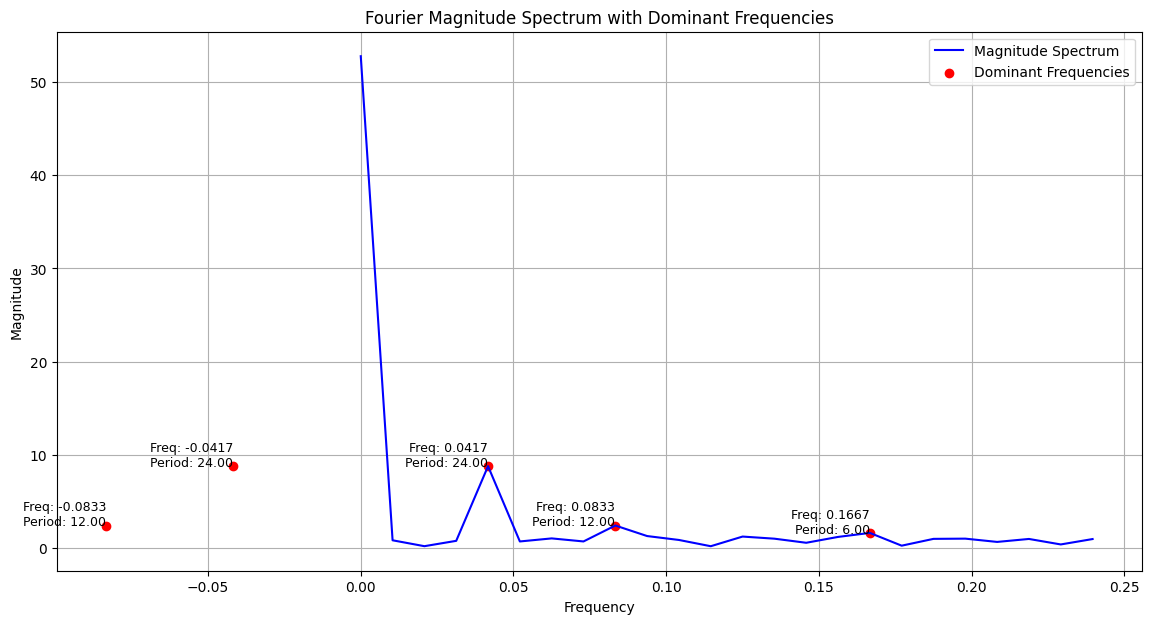


Most Dominant Frequency: -0.04167 (Period: 24.00 time units)


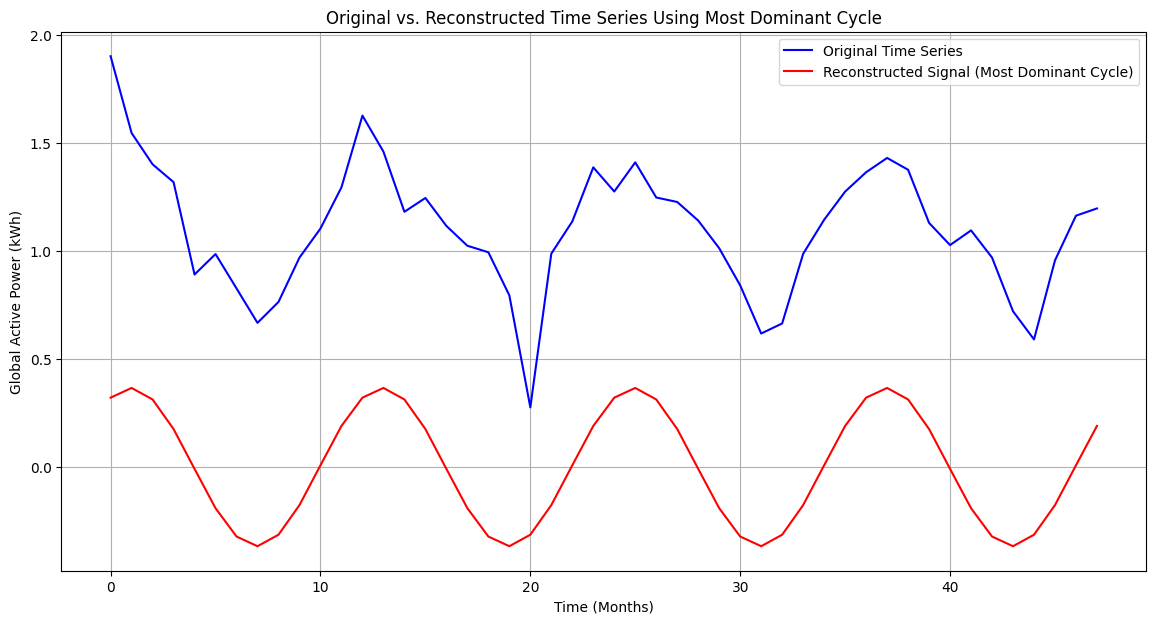

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Data
# Replace the file path with your actual file location
data = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',
                   converters={'Global_active_power': lambda x: pd.to_numeric(x, errors='coerce')},
                   parse_dates={'Datetime': ['Date', 'Time']},
                   infer_datetime_format=True,
                   low_memory=False,
                   na_values=['nan','?'])

# Aggregate to Monthly Data (Adjust as per your data frequency)
data.set_index('Datetime', inplace=True)
monthly_data = data['Global_active_power'].resample('M').mean()

# Handle Missing Values by Filling with Mean
monthly_data.fillna(monthly_data.mean(), inplace=True)

# Step 2: Fourier Transform
time_series = monthly_data
time_series_np = time_series.to_numpy()
n = len(time_series_np)
t = np.arange(n)

# Perform Fast Fourier Transform (FFT)
fft_result = np.fft.fft(time_series_np)
frequencies = np.fft.fftfreq(n, d=2)  # Assuming monthly data; adjust 'd' if different
magnitude = np.abs(fft_result)

# Step 3: Identify Dominant Frequencies
# Exclude the zero frequency (baseline)
non_zero_indices = np.where(frequencies != 0)
non_zero_frequencies = frequencies[non_zero_indices]
non_zero_magnitudes = magnitude[non_zero_indices]

# Find the top 5 dominant frequencies
num_dominant = 5
dominant_indices = np.argsort(non_zero_magnitudes)[-num_dominant:]
dominant_freqs = non_zero_frequencies[dominant_indices]
dominant_magnitudes = non_zero_magnitudes[dominant_indices]

# Calculate Periods from Dominant Frequencies
periods = []
for freq in dominant_freqs:
    if freq != 0:
        period = abs(1 / freq)
        periods.append(period)
    else:
        periods.append(np.inf)  # Infinite period for zero frequency

# Create a DataFrame for Better Visualization
dominant_cycles = pd.DataFrame({
    'Frequency': dominant_freqs,
    'Magnitude': dominant_magnitudes,
    'Period (Time Units)': periods
})

print("Top 5 Dominant Frequencies and Their Periods:")
print(dominant_cycles.sort_values(by='Magnitude', ascending=False))

# Step 4: Visualize the Fourier Magnitude Spectrum with Dominant Frequencies
plt.figure(figsize=(14, 7))
plt.plot(frequencies[:n // 2], magnitude[:n // 2], color='blue', label='Magnitude Spectrum')

# Highlight the dominant frequencies
plt.scatter(dominant_freqs, dominant_magnitudes, color='red', label='Dominant Frequencies')
for i in range(num_dominant):
    plt.text(dominant_freqs[i], dominant_magnitudes[i],
             f"Freq: {dominant_freqs[i]:.4f}\nPeriod: {periods[i]:.2f}",
             fontsize=9, ha='right')

plt.title('Fourier Magnitude Spectrum with Dominant Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Determine the Most Dominant Cycle
# The cycle with the highest magnitude is the most dominant
most_dominant_freq = dominant_freqs[np.argmax(dominant_magnitudes)]
most_dominant_period = periods[np.argmax(dominant_magnitudes)]

print(f"\nMost Dominant Frequency: {most_dominant_freq:.5f} (Period: {most_dominant_period:.2f} time units)")

# Optional: Reconstruct Signal Using Only the Most Dominant Frequency
# Create a mask to keep only the most dominant frequency and its conjugate
reconstructed_fft = np.zeros_like(fft_result)
# Find the index of the most dominant frequency
dominant_index = np.where(frequencies == most_dominant_freq)[0][0]
# Keep the dominant frequency and its negative counterpart
reconstructed_fft[dominant_index] = fft_result[dominant_index]
reconstructed_fft[-dominant_index] = fft_result[-dominant_index]

# Inverse FFT to reconstruct the time-domain signal
reconstructed_signal = np.fft.ifft(reconstructed_fft).real

# Plot Original and Reconstructed Signals
plt.figure(figsize=(14, 7))
plt.plot(t, time_series_np, label='Original Time Series', color='blue')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal (Most Dominant Cycle)', color='red')
plt.title('Original vs. Reconstructed Time Series Using Most Dominant Cycle')
plt.xlabel('Time (Months)')
plt.ylabel('Global Active Power (kWh)')
plt.legend()
plt.grid(True)
plt.show()


                      Voltage  Global_intensity  Global_active_power
Voltage              1.000000         -0.411363            -0.399762
Global_intensity    -0.411363          1.000000             0.998889
Global_active_power -0.399762          0.998889             1.000000


<Axes: >

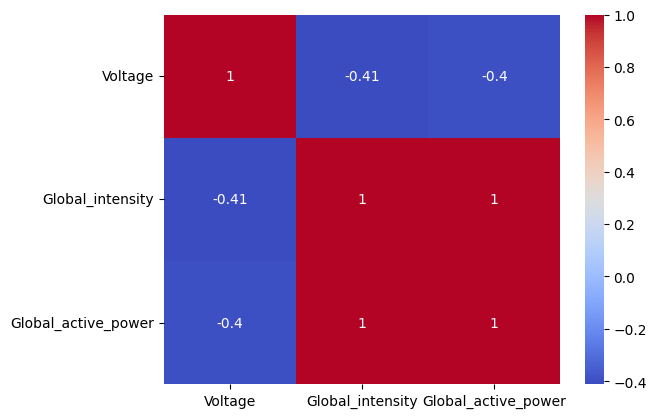

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load only necessary columns, parsing numeric ones directly
X = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',
                usecols=['Voltage', 'Global_intensity', 'Global_active_power'],
                converters={'Global_active_power': lambda x: pd.to_numeric(x, errors='coerce'),
                            'Voltage': lambda x: pd.to_numeric(x, errors='coerce'),
                            'Global_intensity': lambda x: pd.to_numeric(x, errors='coerce')})

# Replace '?' and other non-numeric values with NaN
X = X.replace('?', np.nan)

# Optimized Filling: using NumPy for speed
for col in ['Voltage', 'Global_intensity', 'Global_active_power']:
    col_data = X[col].to_numpy()
    col_mean = np.nanmean(col_data)
    col_data[np.isnan(col_data)] = col_mean
    X[col] = col_data

# Calculate the correlation matrix
correlation_matrix = X[['Voltage', 'Global_intensity', 'Global_active_power']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")